# Development of Breast Cancer Prediction Prototype

# Introduction

Here, we will be developing a prototype that is used in the prediction of breast cancer in patient. Wisconsin breast cancer diagnostic data set is used for predictive analysis. For the training of the data, supervised machine learning algorithms is used. Lots of algorithms will be used to get the best one for our dataset and make the protype effective. Jupyter Notebook is used for developing the program.

# Target

The goal of this proposed prototype is to predict the breast cancer in patient. 

<b>Attribute information:</b>


1. ID number,
2. Diagnosis (M = malignant, B = benign),
3. Ten real-valued features are computed for each cell nucleus:

    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For example, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

# Importing Libraries

Firstly the libraries required in the process were imported. We can import the libaries later as well but to make it easier we are doing it at first.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Loading data

The University of Wisconsin Hospitals, Madison, Wisconsin, USA, has provided a publicly available breast cancer dataset which we will be using for this program. This dataset included 569 breast cancer patients and is available on the [UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

In [2]:
#data loading
df = pd.read_csv("breast_cancer.csv",header = 0)

Now, we can examine the data set using the pandas’ head() method

In [3]:
#checking if the data loaded by right or, not
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Once the data is loaded, using the head() function we got the first 5 rows.
As seen in the chart aboe, the data in the first 5 rows are of the patient having Malignant tumor.

# Cleaning and preparing the data

The information about the DataFrame can be printed using Pandas info() Method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We have a total of non-null 569 patients’ information with 32 features. All feature data types in the float. The size of the DataFrame is 146.8 KB.

We can find any missing or null data points of the data set (if there is any) using the following pandas function.

In [5]:
#returns column with null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

According to the above information, we can see that there is one feature i.e."unnamed" with total null value. 

In [6]:
#returns the size of dataset
df.shape

(569, 33)

In [7]:
#removes the rows that contains NULL values as well as id
df=df.dropna(axis=1)
df.drop('id',axis=1,inplace=True)

As the column "unnamed" had null values, we removed it for making the data better.  
Also, we dropped the column "id".

In [8]:
#size of dataset after removing column with null values
df.shape

(569, 31)

In [9]:
#information of data after removing column with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

After removing the rows with null values, we have a total of 30 features.

In [10]:
# convert the value of M and B into 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Visualizing the data

Once the cleaning and preparing the data is completed, we can now visualize the cleaned data. It is  easier to analyze and understand different and patterns in data through applying visual components such as histogram, count plot, scatter plot, pair plot, heatmap etc.

## Count plot

Count Plot in Seaborn is used to display the counts of observations in each categorical bin using bars.

In [12]:
# Get the count of malignant<M> and Benign<B> cells
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Diagnosis (M=1 , B=0)')

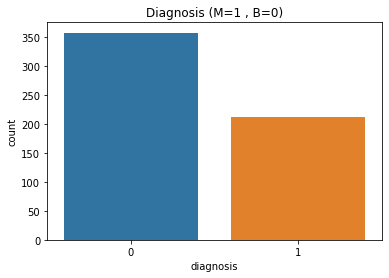

In [13]:
sns.countplot(df['diagnosis'],label="count").set_title('Diagnosis (M=1 , B=0)')

Showing the total count of malignant and benign tumor patients in countplot, we got to know that patient having malignant tumor are higher than the patient having benign tumor.

<AxesSubplot:xlabel='radius_mean', ylabel='count'>

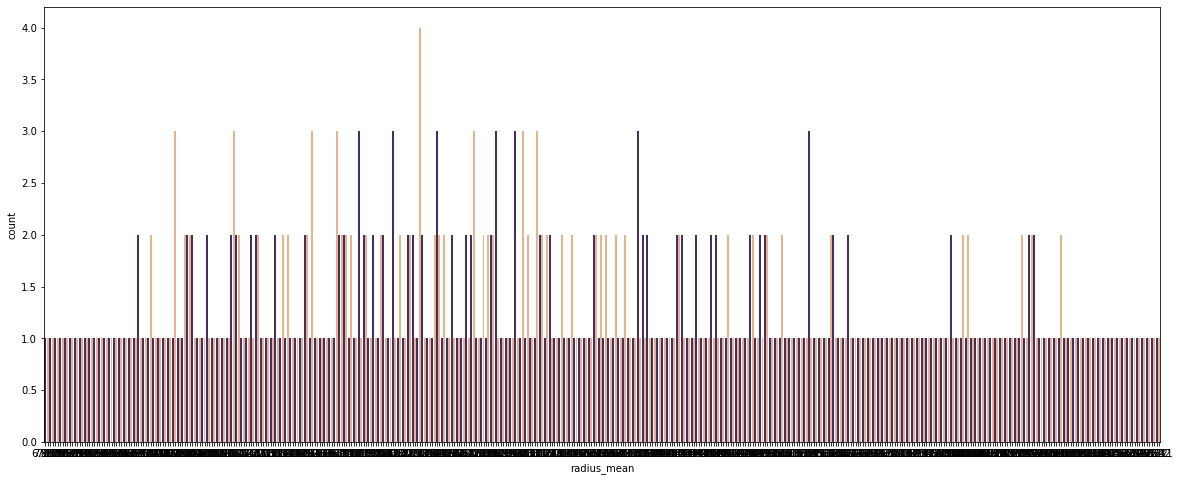

In [14]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(df['radius_mean'], palette=['#432371',"#FAAE7B"])

In the above counterplot, maximum samples radius_mean is equal to 1. Person whose raduis_mean is higher than 1 have high chance of having malignant tumor while patient whose raduis_mean is less than 1 have chance of having benign tumor.

## nucleus features vs diagnosis

In [15]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

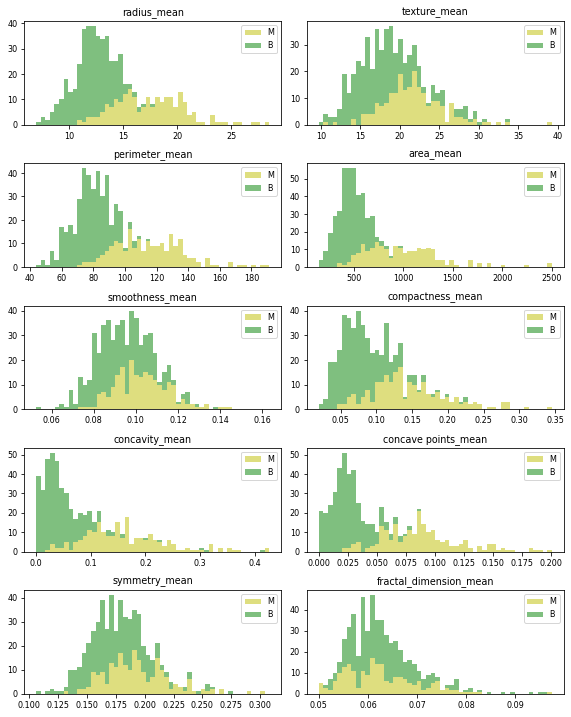

In [16]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['y','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

<b>Observations</b>
- mean values of cell, radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Scatter Plot

Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them. The scatter() method in the matplotlib library is used to draw a scatter plot.

In [17]:
corr_matrix= df.corr()
corr_matrix['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

array([[<AxesSubplot:xlabel='diagnosis', ylabel='diagnosis'>,
        <AxesSubplot:xlabel='concave points_worst', ylabel='diagnosis'>,
        <AxesSubplot:xlabel='perimeter_worst', ylabel='diagnosis'>,
        <AxesSubplot:xlabel='concave points_mean', ylabel='diagnosis'>,
        <AxesSubplot:xlabel='smoothness_se', ylabel='diagnosis'>],
       [<AxesSubplot:xlabel='diagnosis', ylabel='concave points_worst'>,
        <AxesSubplot:xlabel='concave points_worst', ylabel='concave points_worst'>,
        <AxesSubplot:xlabel='perimeter_worst', ylabel='concave points_worst'>,
        <AxesSubplot:xlabel='concave points_mean', ylabel='concave points_worst'>,
        <AxesSubplot:xlabel='smoothness_se', ylabel='concave points_worst'>],
       [<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_worst'>,
        <AxesSubplot:xlabel='concave points_worst', ylabel='perimeter_worst'>,
        <AxesSubplot:xlabel='perimeter_worst', ylabel='perimeter_worst'>,
        <AxesSubplot:xlabel='concave poi

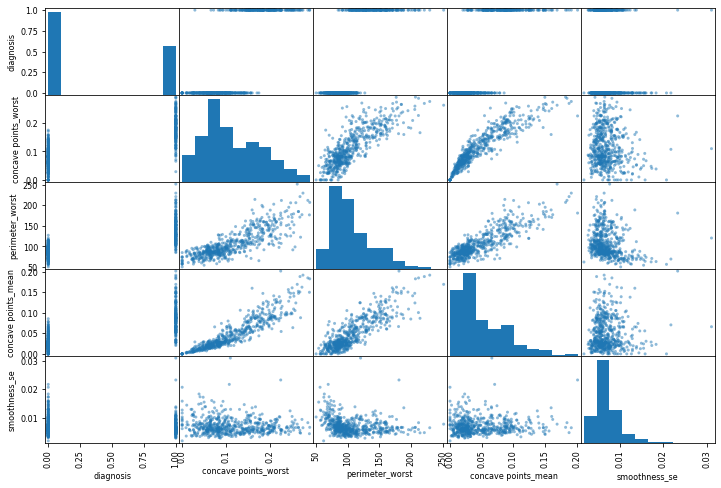

In [18]:
from pandas.plotting import scatter_matrix

#scatter plot of top features

attributes=["diagnosis", "concave points_worst","perimeter_worst","concave points_mean","smoothness_se"]
scatter_matrix(df[attributes],figsize=(12,8))

After plotting the data we can clearly see that 'concave points_worst' has strong positive correlation and 'smoothness_se' has just negative correlation. In positive the image forms upward direction and in negative image forms downward direction.

## Heat Map

A heatmap is a graphical representation of data where each value of a matrix is represented as a color. contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used in it.

### Heat map of whole dataframe

<AxesSubplot:>

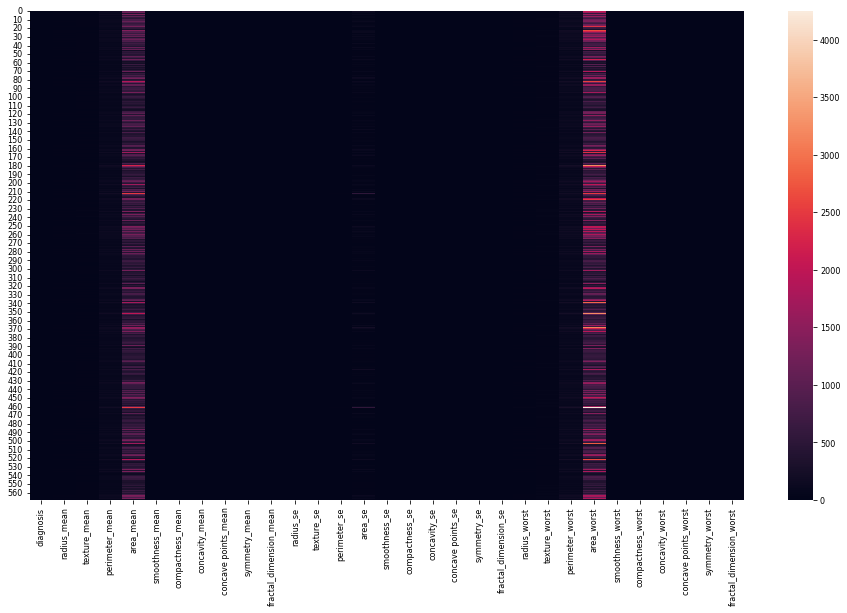

In [19]:
# heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(df)

In the heatmap of dataframe above, we can see the variety of different feature’s value. The value of feature ‘mean area’ and ‘worst area’ are greater than other feature's value while the value of ‘mean perimeter’, ‘area se’, and ‘worst perimeter’ are slightly less but greater than remaining features.

### Co-relation

Correlation coefficients quantify the association between variables or features of a dataset. These statistics are of high importance.
corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [20]:
# get the correlation
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Heatmap of a co-relation matrix

<AxesSubplot:>

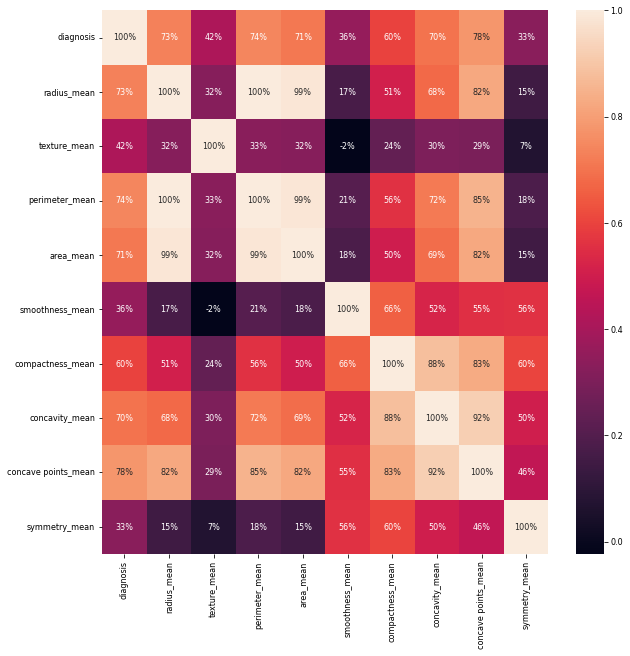

In [21]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:10].corr(),annot=True,fmt=".0%")

The output above shows the positive correlation between concave points_mean and the target. This means if the concave points_mean have greater value then, there is a more chances of having malignant tumor. 

Similarly, we can see the negative correlation between texture_mean and smoothness_mean.

## Correlation barplot

In [22]:
# create second DataFrame by droping target
df2 = df.drop(['diagnosis'], axis = 1)
print("The shape of 'df2' is : ", df2.shape)

The shape of 'df2' is :  (569, 30)


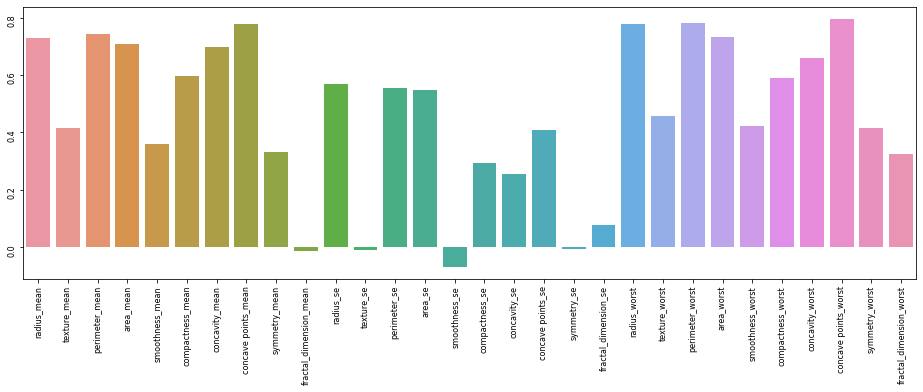

In [23]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(df2.corrwith(df.diagnosis).index, df2.corrwith(df.diagnosis))
ax.tick_params(labelrotation = 90 )

Only the feature 'smoothness se' is considerably negatively linked with the target as can be seen in the above correlation barplot. The features 'factor dimension mean', 'texture se,' and 'symmetry se' are all less negatively co-related, whereas all the other remaining features are strongly positively correlated.

# Creating a test set and a training set

In [24]:
df.shape

(569, 31)

The above function shows the number of rows and columns in the dataframe. Knowing this thing is really helpful for us before splitting the dataset. The dataset must have correct balanced proportion of data sothat the results produced will be accurate and perfect. 

Since this data set is not ordered, I am going to do a simple 70:30 split to create a training data set and a test data set.

In [25]:
#split the dataset into 70% training and 30% testing
traindf, testdf = train_test_split(df, test_size = 0.3)

# Model Classification

Here we are going to build a classification model and evaluate its performance using the training set.

In [26]:
#Generic function for making a classification model and accessing the performance.
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data[predictors]):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

## Logistic Regression model

Logistic regression is widely used for classification of discrete data. In this case we will use it for binary (1,0) classification.

Based on the observations in the histogram plots, we can reasonably hypothesize that the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. We can then perform a logistic regression analysis using those features as follows:

In [27]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 88.442%
Cross-Validation Score : 87.500%
Cross-Validation Score : 88.750%
Cross-Validation Score : 89.167%
Cross-Validation Score : 89.027%
Cross-Validation Score : 88.437%


The prediction accuracy is reasonable. What happens if we use just one predictor? Let's use the radius_mean:

In [28]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 86.935%
Cross-Validation Score : 86.250%
Cross-Validation Score : 87.500%
Cross-Validation Score : 87.083%
Cross-Validation Score : 86.831%
Cross-Validation Score : 86.680%


This gives a similar prediction accuracy and a cross-validation score.

The accuracy of the predictions are good but not great. The cross-validation scores are reasonable. Can we do better with another model?

## K-Nearest Neighbor(KNN) algorithm 

The k-nearest neighbors (KNN) algorithm is a data categorization approach that estimates the chance that a data point will belong to one of two groups based on the data points closest to it. It is a sort of supervised ML technique that is used in addressing classification and regression issues. It is, basically, mostly employed to solve categorization problems.

In [29]:
from sklearn.neighbors import KNeighborsClassifier 

In [30]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model =KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.950%
Cross-Validation Score : 86.250%
Cross-Validation Score : 86.875%
Cross-Validation Score : 87.917%
Cross-Validation Score : 88.089%
Cross-Validation Score : 87.434%


Lets use a single predictor i.e. radius_mean.

In [31]:
predictor_var = ['radius_mean']
model = KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.196%
Cross-Validation Score : 86.250%
Cross-Validation Score : 86.250%
Cross-Validation Score : 86.667%
Cross-Validation Score : 86.519%
Cross-Validation Score : 86.177%


The accuracy of the prediction is much much better here but the cross-validation score is not that great.

## Random Forest

The Random Forest is a Supervised ML Algorithm built using decision trees. It is widely used to anticipate behavior and results in a variety of sectors. For classification problems, it is among of the very famous and commonly used ML methods. It can be used to express regression problems as well, although it operates better at classification models.

In [32]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 94.975%
Cross-Validation Score : 95.000%
Cross-Validation Score : 93.750%
Cross-Validation Score : 94.583%
Cross-Validation Score : 93.089%
Cross-Validation Score : 92.699%


Using all the features improves the prediction accuracy and the cross-validation score is great.

Random Forest is that it returns a feature importance matrix which can be used to select features. So lets select the top 5 features and use them as predictors.

In [33]:
#Create a series with feature importances:
feature_imp_matrix = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(feature_imp_matrix)

concave points_mean       0.278951
perimeter_mean            0.206016
area_mean                 0.157112
concavity_mean            0.120788
radius_mean               0.098559
compactness_mean          0.048374
texture_mean              0.043705
symmetry_mean             0.021573
smoothness_mean           0.014115
fractal_dimension_mean    0.010808
dtype: float64


In [34]:
# Using top 5 features
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 94.975%
Cross-Validation Score : 92.500%
Cross-Validation Score : 91.875%
Cross-Validation Score : 92.917%
Cross-Validation Score : 91.523%
Cross-Validation Score : 92.206%


The prediction accuracy only changes a bit when using the top 5 features but I think we get a better result using all the predictors.
Lets try using a single predictors as previous:

In [35]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 97.236%
Cross-Validation Score : 78.750%
Cross-Validation Score : 81.250%
Cross-Validation Score : 82.083%
Cross-Validation Score : 81.499%
Cross-Validation Score : 80.896%


Prediction accuracy is better but cross validation score are not that great. 

## Using on the test data set

In [36]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 95.906%
Cross-Validation Score : 82.857%
Cross-Validation Score : 88.487%
Cross-Validation Score : 89.384%
Cross-Validation Score : 91.303%
Cross-Validation Score : 92.454%


Using the Random Forest model above, the prediction accuracy for the test data set  is ~95%.

# Conclusion

From this analysis, it is found that the best model that can be used in the diagnosis of breast cancer is the Random Forest model with the top 5 predictors, 'concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'. It gave a prediction accuracy of ~95% and a cross-validation score of ~90% in the test data set.

But this can be improved further by tweaking the model and trying other models in the analysis that will be done later. 

# Instructions

1. First, open anaconda navigator.
2. Then, launch jupyter notebook from the navigator.
3. Search for the file which you want to load.
4. Click the file which will open a new tab where the code in the selected file will be loaded.
5. Now, run all the cells.
6. If you want to edit or add code in it then rerun and restart all the cell after performing edit.